# Demo 10 - Predictive Models: Classification

In this notebook we'll use the famous [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) to check out some real decision trees!  

<img src="https://github.com/nmattei/cmps3160/blob/master/_demos/data/iris.png?raw=1">

This data set has:
1. 150 instances with 4 attributes (same units, all numeric)
2. Balanced class distribution
3. No missing data

In [2]:
# clone the course repository, change to right directory, and import libraries.
%cd /content
!git clone https://github.com/nmattei/cmps3160.git
%cd /content/cmps3160/_demos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use('fivethirtyeight')
# Make the fonts a little bigger in our graphs.
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['pdf.fonttype'] = 42

/content
Cloning into 'cmps3160'...
remote: Enumerating objects: 1647, done.
remote: Counting objects: 100% (537/537), done.
remote: Compressing objects: 100% (229/229), done.
remote: Total 1647 (delta 319), reused 445 (delta 261), pack-reused 1110
Receiving objects: 100% (1647/1647), 45.27 MiB | 25.97 MiB/s, done.
Resolving deltas: 100% (920/920), done.
/content/cmps3160/_demos


In [3]:
# Import the data and check it out...
df_iris = pd.read_csv("./data/iris.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df_iris.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Make a test and train split.  Note that we are using a *stratified sample* here so that we don't mess up our classifier! [More info in the docs!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [6]:
# Vectorize the whole thing...
import sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_iris,
                               test_size=0.4,
                               stratify=df_iris["species"])

In [7]:
# Check that...
train.groupby("species").size()

species
setosa        30
versicolor    30
virginica     30
dtype: int64

In [8]:
test.groupby("species").size()

species
setosa        20
versicolor    20
virginica     20
dtype: int64

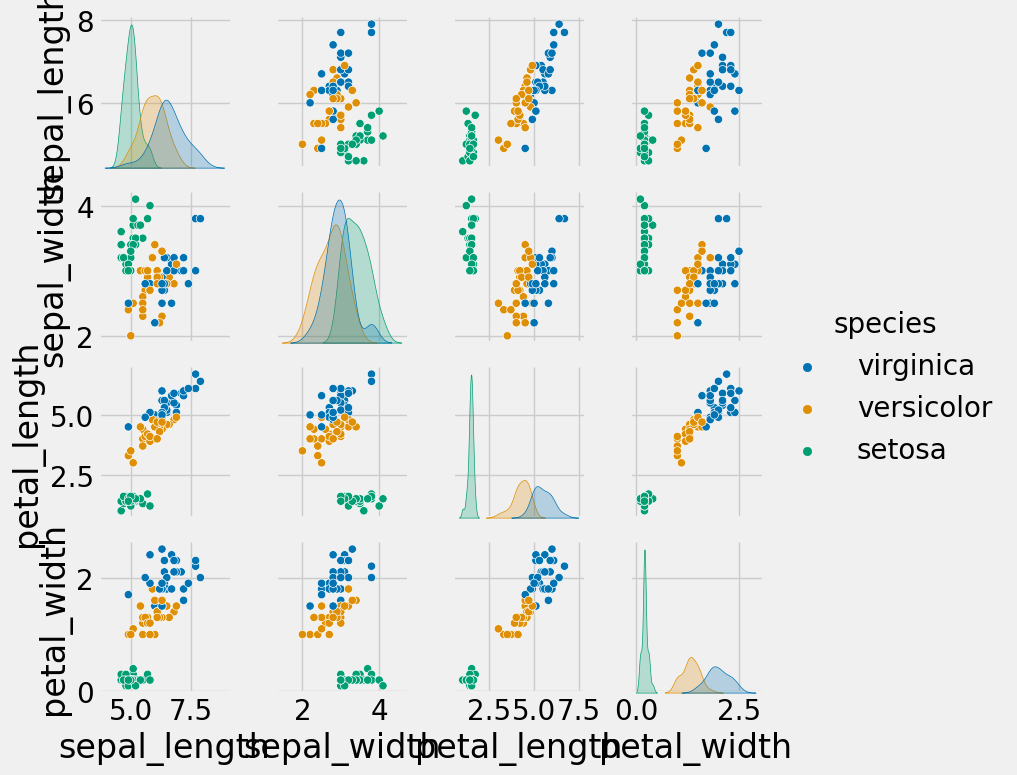

In [9]:
# Just for fun..
import seaborn as sns
sns.pairplot(train, hue="species", height=2, palette='colorblind')

<ipython-input-10-70598935ed91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


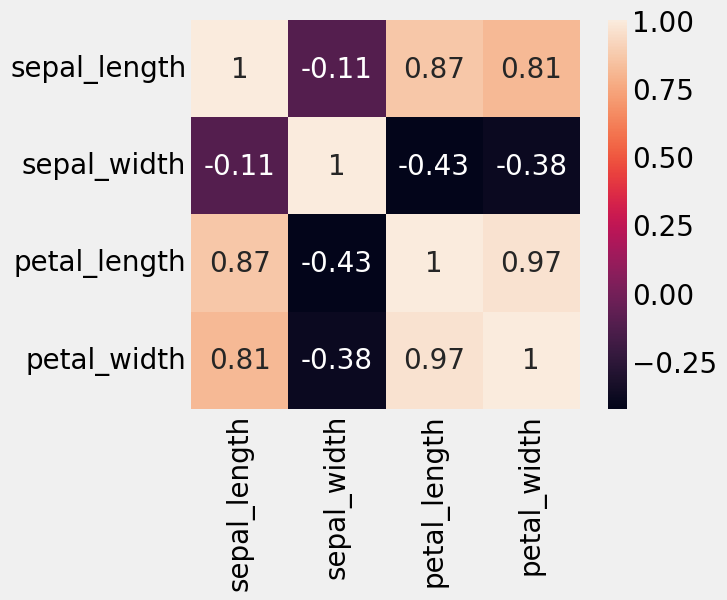

In [10]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

## Decision Tree

Now let's build a decision tree!

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
features = ['sepal_length','sepal_width','petal_length','petal_width']
X_train = train[features]
y_train = train.species
X_test = test[features]
y_test = test.species

In [12]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)

In [13]:
# Check some measures...
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction,y_test):.3f}")
print(f"The Precision of the Decision Tree is {metrics.precision_score(prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of the Decision Tree is {metrics.recall_score(prediction,y_test,average='weighted'):.3f}")

The accuracy of the Decision Tree is 0.967
The Precision of the Decision Tree is 0.970
The Recall of the Decision Tree is 0.967


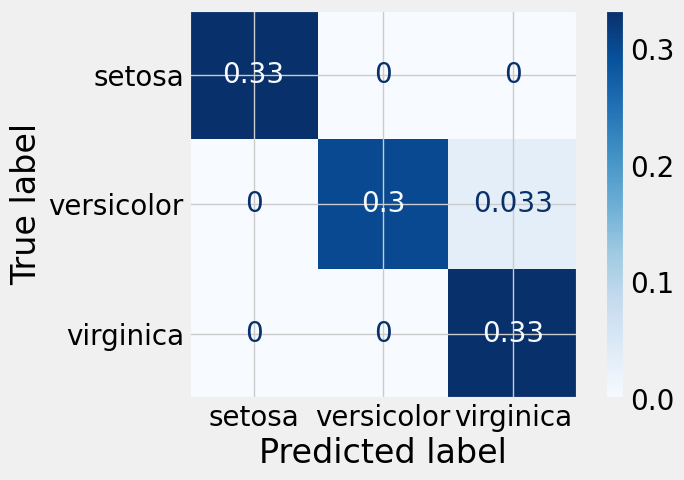

In [14]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(mod_dt, X_test, y_test,
                                        display_labels=mod_dt.classes_,
                                        cmap=plt.cm.Blues, normalize='all')

In [15]:
# Cooler...
mod_dt.feature_importances_


array([0.        , 0.        , 0.39282836, 0.60717164])

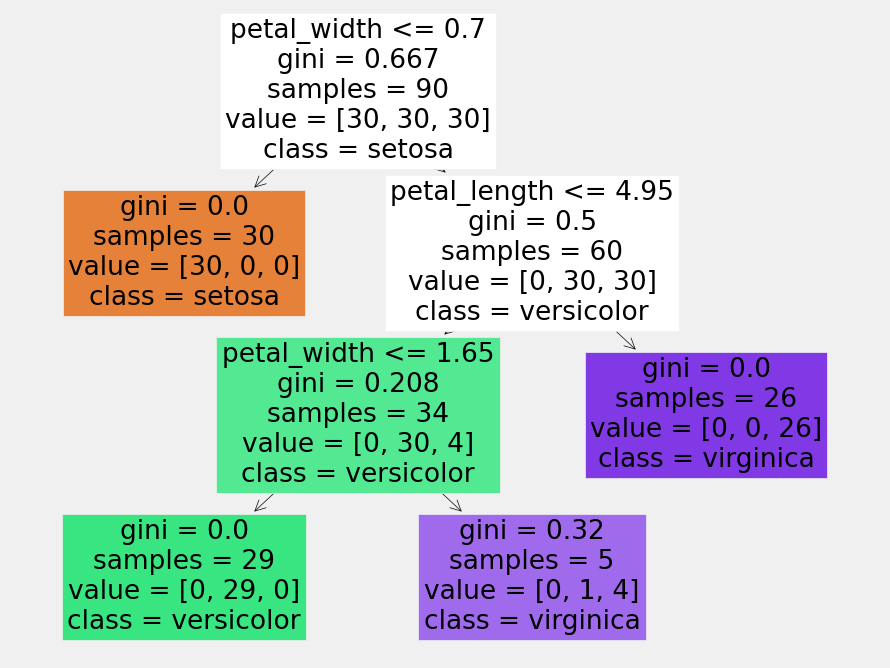

In [16]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = features, class_names = mod_dt.classes_, filled = True);

The Above only is using petal_width and petal_length... so we can plot the decision boundry..

<img src="https://github.com/nmattei/cmps3160/blob/master/_demos/data/boundry.png?raw=1">

## Logistic Regression

Let's compare with Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr_prediction=lr.predict(X_test)
print(f"The accuracy of Logistic Regression is {metrics.accuracy_score(lr_prediction,y_test):.3f}")
print(f"The Precision of Logistic Regression is {metrics.precision_score(lr_prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of Logistic Regression is {metrics.recall_score(lr_prediction,y_test,average='weighted'):.3f}")

The accuracy of Logistic Regression is 0.967
The Precision of Logistic Regression is 0.970
The Recall of Logistic Regression is 0.967


### Logistic Regression coefficients

We can inspect the `_coef` variable of the LogisticRegression classifier to find the $\beta$ coefficients for each class. This is a matrix where cell (i,j) returns the $\beta$ parameter for class $i$ and feature $j$.

In [19]:
lr.coef_

array([[-0.34939828,  0.81114766, -2.20700185, -0.9673516 ],
       [ 0.31637364, -0.21899739, -0.14114911, -0.72678784],
       [ 0.03302464, -0.59215027,  2.34815096,  1.69413944]])

In [20]:
# let's put the coefficients into a nice data frame.
pd.DataFrame(lr.coef_, columns=features, index=lr.classes_)

,sepal_length,sepal_width,petal_length,petal_width
setosa,-0.349398,0.811148,-2.207002,-0.967352
versicolor,0.316374,-0.218997,-0.141149,-0.726788
virginica,0.033025,-0.592150,2.348151,1.694139


We can inspect the coefficients for each class for some insights into what the predictive features are. For example, `petal_length` appears to be strongly positively associated with the `virginica` class, which matches what we saw above in the pairplot.



### Decision Boundary

To visualize the decision boundary, we'll fit a new Logistic Regression classifier using two dimensions.

We'll then make a countour plot showing the predictions as the two features change.

Note that in the latest version of sklearn, there is a [class](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay) that makes this plotting easier, but it is not available on Colab.

In [21]:
# fit a classifier using only two features
features_s = ['petal_length','petal_width']
X_train_s = train[features_s]
X_test_s = test[features_s]
lr.fit(X_train_s,y_train)
lr_prediction_s=lr.predict(X_test_s)

In [22]:
# generate a grid of points for many posible values of petal length and width.
xx, yy = np.mgrid[0:7:.01, 0:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
grid_preds = lr.predict(grid)
label2int = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
labelints = np.array([label2int[s] for s in grid_preds])
labelints = labelints.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


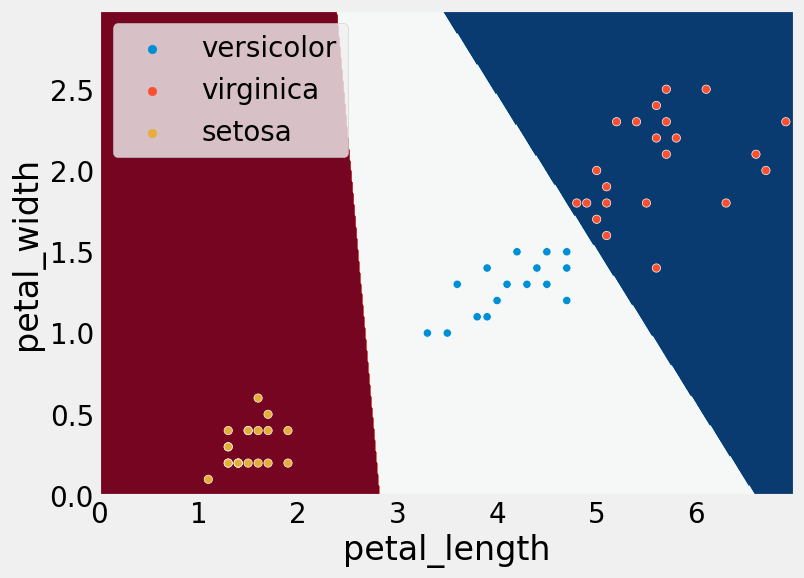

In [23]:
# plot the predicted class for each point.
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, labelints, 25, cmap="RdBu")
sns.scatterplot(data=X_test, ax=ax, x='petal_length', y='petal_width', hue=lr_prediction_s)
plt.legend(loc='upper left')

## Text classification

In this example we go through a light example of processing a dataset for analyzing text.

The data comes from [this website](https://www.cs.cornell.edu/people/pabo/movie-review-data/) at Cornell and is from Bo Pang and Lillian Lee, A Sentimental Education: Sentiment Analysis Using Subjectivity Summarization Based on Minimum Cuts, Proceedings of ACL 2004.

This contains 1000 positive and 1000 negative movie reviews. Our job is to classify a review as positive or negative based on the text.

In [ ]:
# need to unzip the data first.
!unzip ./data/review_polarity.zip -d ./data/

In [ ]:
!ls data/review_polarity/pos

In [26]:
!cat data/review_polarity/pos/cv193_5416.txt

on the basis of this film alone , i never would have predicted that , in two years , quentin tarantino would become the country's biggest hotshot director . 
reservoir dogs has hints of the tarantino brilliance that emerged in pulp fiction , but is a much less substantive , more conventional crime story than the big pf . 
here's what the two movies do have in common . . . 
--scenes of intelligent , amusing dialogue with no relevance to the plot --a story that jumps back and forth in time rather than going in a logical , chronological sequence --graphic yet necessary violence --an engaging crime story --dialogue liberally spiced with swear words and racial/gender slurs --three of the same actors ( harvey keitel , tim roth and steve buscemi ) --a mexican standoff ending , although this one is considerably less optimistic than pf 
reservoir dogs is an entire hour shorter than pulp fiction because it's only got one story to tell rather than three . 
crime lord joe cabot ( veteran actor law

In [27]:
import glob

# labels are based on which directory the files are in.
all_pos = list(glob.glob("./data/review_polarity/pos/*"))
all_neg = list(glob.glob("./data/review_polarity/neg/*"))
labels = np.array([1] * len(all_pos) + [0] * len(all_neg))
filenames = all_pos + all_neg

We'll use TfidfVectorizer to convert each document into a (sparse) *feature* vector.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

vec = TfidfVectorizer(input='filename', stop_words='english')
X = vec.fit_transform(filenames)
X.shape

(2000, 39354)

So, we have 2000 documents and 39,659 unique words.

How big is this matrix?

Wait, how do we store that?

dense matrix:
$$
X=
  \begin{bmatrix}
    0.1 & 2.8 & 3.2 & ... & 1.5 \\
    3.2 & 4.1 & 5.1 & ... & 2.7  \\
    ...\\
    1.4 & 3.4 & 7.5 & ... & 7.5  \\
  \end{bmatrix}
$$

sparse matrix:
$$
X=
  \begin{bmatrix}
    0.1 & 0 & 0 & ... & 1.5 \\
    0 & 0 & 0 & ... & 2.7  \\
    ...\\
    0 & 3.4 & 0 & ... & 0  \\
  \end{bmatrix}
$$

How can we store a sparse matrix more efficiently?

<br><br><br>
[CSR matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)

In [29]:
X[0]

<1x39354 sparse matrix of type '<class 'numpy.float64'>'
	with 160 stored elements in Compressed Sparse Row format>

In [30]:
filenames[0]

'./data/review_polarity/pos/cv221_2695.txt'

In [31]:
!cat ./data/review_polarity/pos/cv839_21467.txt

assume nothing . 
the phrase is perhaps one of the most used of the 1990's , as first impressions and rumors are hardly ever what they seem to be . 
the phrase especially goes for oscar novak , an architect who is the main focus of three to tango , a delightful , funny romantic comedy about assumptions and being yourself . 
novak ( matthew perry ) , a shy , clumsy , chicago based architect , along with openly gay partner , peter steinberg ( oliver platt ) , fights for projects day in and day out . 
one of these is the job of restoring a popular building for charles newman ( dylan mcdermott ) , a rich , well-known businessman . 
charles immediately takes a liking to oscar , as he enjoys his personality and sense of humor . 
seeing oscar as someone he could trust , charles asks him to watch his girlfriend , an unpredictable , adventurous girl named amy post ( neve campbell ) , who makes a living by blowing glass . 
charles wants to know who she talks to , what she does , and where she go

In [32]:
X[0].indices

array([ 3533,  1114, 38131, 18551,  1002, 36300, 30337, 23444, 14089,
       22614,  8468, 26206, 25088, 14956, 30413,  4680, 29158, 21009,
       10404, 20510, 20430,  3152, 33459, 15964, 15138, 18827, 38616,
       38155, 24335, 29052, 23281, 22654, 10067, 23739,  8564,  4487,
       13499, 19818,  7232,  5599, 13668,   874, 26188,   979, 24596,
        2830, 11443, 33582,  6430,  5132,  8109,  3878,  3688,  4819,
        6778, 29517,  6273, 18844, 28122, 25338,  9802,   708,  1337,
       12221, 12419, 31059, 31701, 21574,  9217, 16867,  2737, 35769,
       26147,  9643, 20351,  6543, 33281, 27057,  4187, 38209, 18838,
       17902,  8287, 23063, 33921,  7968, 29711, 10708,  4167, 16427,
       33460, 38242, 38888, 12701, 37044, 33248, 31794,  7514, 31934,
       38627, 39327, 37807,  5097, 29387,  5284, 33490, 12796, 25314,
       13547,  6155, 10535, 33586, 38625, 24376,  8110,  2827, 14840,
       26144, 22680,  3833,  1386, 18515,  7895,  2670,  3625, 24273,
       22731, 33259,

In [33]:
feature_names = np.array(vec.get_feature_names_out())
feature_names[X[0].indices]

array(['belief', 'adorable', 'warton', 'jacob', 'adam', 'twins', 'say',
       'needless', 'funny', 'moe', 'curly', 'plays', 'pantolianto',
       'gorilla', 'scene', 'brian', 'retirement', 'machine', 'doo',
       'little', 'lines', 'barking', 'stooge', 'head', 'great', 'joe',
       'wincing', 'watch', 'ones', 'respectively', 'nanny', 'mom',
       'disposable', 'nixon', 'cynthia', 'boyle', 'flynn', 'lara',
       'concern', 'cartoon', 'forget', 'accordingly', 'play', 'actors',
       'ouch', 'awww', 'emotions', 'street', 'city', 'busy', 'crawling',
       'bit', 'best', 'brother', 'coen', 'rival', 'choreography',
       'johnson', 'read', 'patrick', 'director', 'abetted', 'aided',
       'execution', 'extended', 'set', 'simple', 'mastery',
       'demonstrates', 'hughes', 'automobiles', 'trains', 'planes', 'did',
       'like', 'clear', 'steer', 'probably', 'bobbitt', 'wayne', 'john',
       'injuries', 'crotch', 'multiple', 'suffer', 'course', 'roofs',
       'dropped', 'boards', '

In [34]:
X[0].data

array([0.06466203, 0.06964213, 0.10076052, 0.07596732, 0.05949593,
       0.07142286, 0.02836668, 0.06504239, 0.0302586 , 0.10076052,
       0.08309749, 0.02836668, 0.10076052, 0.07793138, 0.02458245,
       0.05721464, 0.07426597, 0.05211835, 0.15382309, 0.02261378,
       0.0383088 , 0.091929  , 0.091929  , 0.03625707, 0.05231996,
       0.09594417, 0.10076052, 0.03125328, 0.09099661, 0.06291393,
       0.08908589, 0.06000564, 0.07596732, 0.08025438, 0.08159679,
       0.07276528, 0.08025438, 0.08025438, 0.06909987, 0.05700746,
       0.04935952, 0.08025438, 0.03555123, 0.02991086, 0.08908589,
       0.10076052, 0.05269108, 0.04891631, 0.03934443, 0.06466203,
       0.08025438, 0.03254136, 0.02357502, 0.04356998, 0.07142286,
       0.05700746, 0.07426597, 0.06583898, 0.04477004, 0.05742524,
       0.02293565, 0.09559441, 0.0702085 , 0.06109065, 0.05924852,
       0.0305644 , 0.04008479, 0.07793138, 0.06291393, 0.0666887 ,
       0.08159679, 0.07508827, 0.07691155, 0.02966816, 0.03285

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.4,
                                                    shuffle=True, random_state=42)

In [36]:
textlr = LogisticRegression()
textlr.fit(X_train, y_train)
y_predicted = textlr.predict(X_test)
print(f"accuracy= {metrics.accuracy_score(y_predicted,y_test):.3f}")
print(f"precision= {metrics.precision_score(y_predicted,y_test):.3f}")
print(f"recall ={metrics.recall_score(y_predicted,y_test):.3f}")

accuracy= 0.835
precision= 0.834
recall =0.838


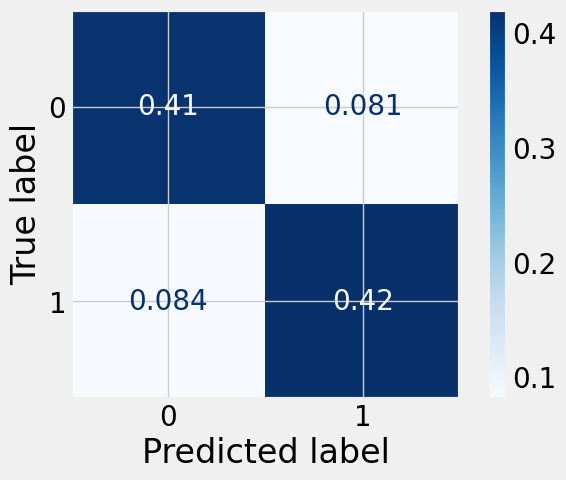

In [38]:
ConfusionMatrixDisplay.from_estimator(textlr, X_test, y_test,
                                        display_labels=textlr.classes_,
                                        cmap=plt.cm.Blues, normalize='all')

In [39]:
pos_coef = pd.DataFrame(textlr.coef_[0],  index=feature_names).rename(columns={0: 'coef'})
pos_coef.sort_values('coef', ascending=False).head(20)

,coef
life,1.235750
great,1.060684
truman,0.949140
jackie,0.894558
chan,0.755376
world,0.755050
mulan,0.723132
love,0.701197
true,0.653106
especially,0.650258


In [40]:
pos_coef.sort_values('coef', ascending=True).head(20)

,coef
bad,-2.136592
movie,-1.225071
worst,-1.223347
plot,-1.185123
stupid,-1.132990
boring,-1.107940
supposed,-1.003987
batman,-0.904661
script,-0.880859
waste,-0.821339


## Titanic

Let's fit a Decision Tree classifier on the Titanic data as well.

In [41]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic = pd.get_dummies(df_titanic, columns=['sex'])
# Be cheeky with our NAN
df_titanic = df_titanic[(df_titanic["age"].notna()) & (df_titanic["fare"].notna())]
df_titanic.head()

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


In [42]:
train, test = train_test_split(df_titanic,
                               test_size=0.4,
                               stratify=df_titanic["survived"])

In [43]:
features = ["pclass", "fare", "sex_female", "age"]
X_train = train[features]
y_train = train.survived
X_test = test[features]
y_test = test.survived

In [44]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
# Check some measures...
print(f"The accuracy of the Decision Tree is {metrics.accuracy_score(prediction,y_test):.3f}")
print(f"The Precision of the Decision Tree is {metrics.precision_score(prediction,y_test,average='weighted'):.3f}")
print(f"The Recall of the Decision Tree is {metrics.recall_score(prediction,y_test,average='weighted'):.3f}")

The accuracy of the Decision Tree is 0.830
The Precision of the Decision Tree is 0.836
The Recall of the Decision Tree is 0.830


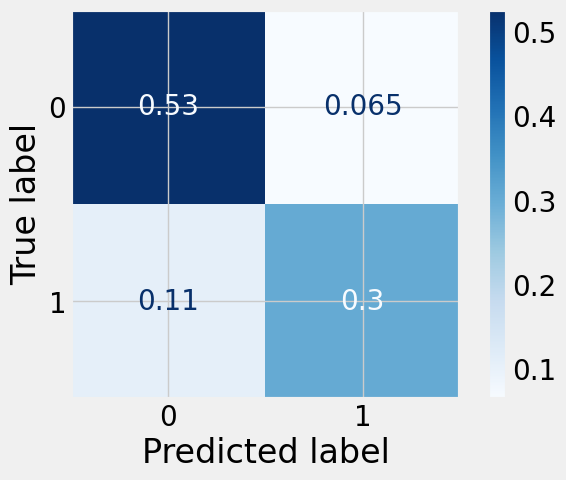

In [45]:
# Plot some graphs...
ConfusionMatrixDisplay.from_estimator(mod_dt, X_test, y_test,
                                        display_labels=mod_dt.classes_,
                                        cmap=plt.cm.Blues, normalize='all')

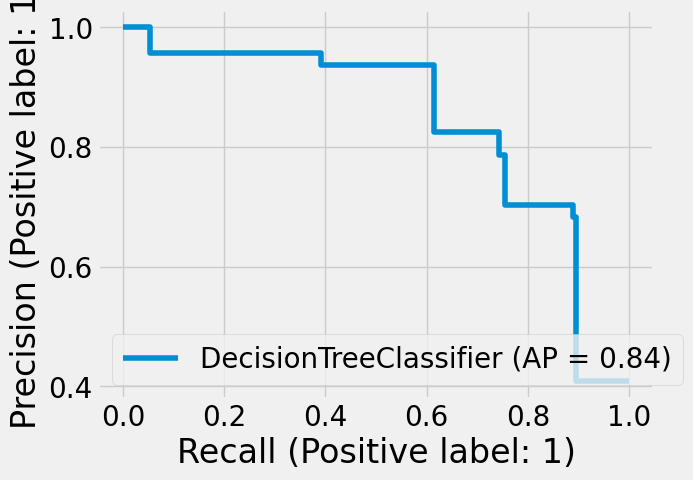

In [47]:
# Plot some graphs...
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(mod_dt, X_test, y_test)

[Text(0.5, 0.875, 'sex_female <= 0.5\ngini = 0.483\nsamples = 627\nvalue = [371, 256]\nclass = died'),
 Text(0.25, 0.625, 'age <= 13.5\ngini = 0.334\nsamples = 392\nvalue = [309, 83]\nclass = died'),
 Text(0.125, 0.375, 'pclass <= 2.5\ngini = 0.5\nsamples = 34\nvalue = [17, 17]\nclass = died'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]\nclass = survived'),
 Text(0.1875, 0.125, 'gini = 0.466\nsamples = 27\nvalue = [17, 10]\nclass = died'),
 Text(0.375, 0.375, 'pclass <= 1.5\ngini = 0.301\nsamples = 358\nvalue = [292, 66]\nclass = died'),
 Text(0.3125, 0.125, 'gini = 0.39\nsamples = 94\nvalue = [69, 25]\nclass = died'),
 Text(0.4375, 0.125, 'gini = 0.262\nsamples = 264\nvalue = [223, 41]\nclass = died'),
 Text(0.75, 0.625, 'pclass <= 2.5\ngini = 0.388\nsamples = 235\nvalue = [62, 173]\nclass = survived'),
 Text(0.625, 0.375, 'fare <= 28.856\ngini = 0.126\nsamples = 133\nvalue = [9, 124]\nclass = survived'),
 Text(0.5625, 0.125, 'gini = 0.256\nsamples = 53\nvalue = [8,

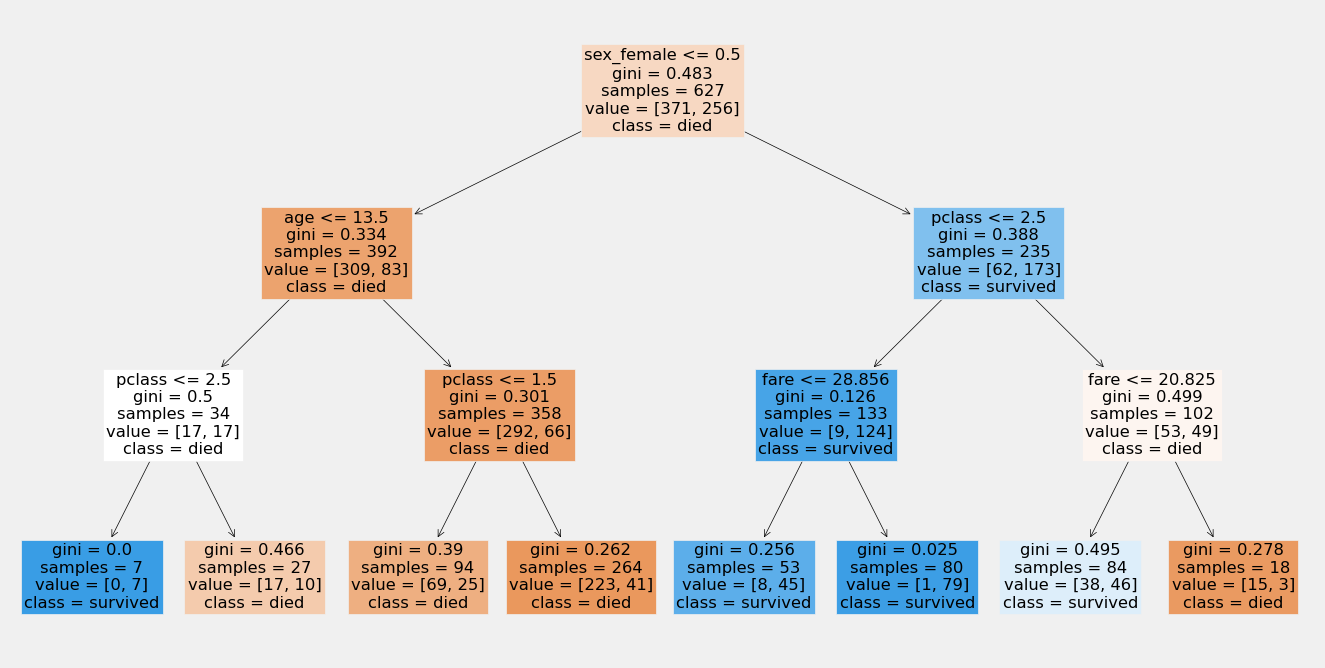

In [48]:
plt.figure(figsize = (15,8))
plot_tree(mod_dt, feature_names = features, class_names={1:"survived", 0:"died"}, filled = True)